##1. IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

##2. LOAD THE DATASHEET

In [2]:
df=pd.read_csv("dataset_website.csv")

In [3]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.tail()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


##3.Handling null values

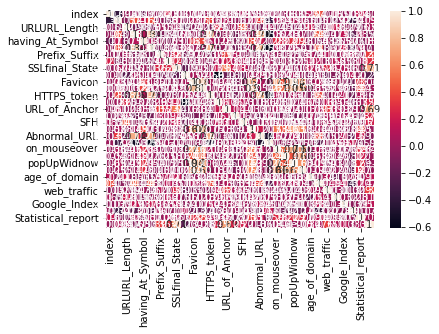

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.skew()

index                          0.000000
having_IPhaving_IP_Address    -0.661064
URLURL_Length                  1.636149
Shortining_Service            -2.192571
having_At_Symbol              -1.963891
double_slash_redirecting      -2.210420
Prefix_Suffix                  2.167975
having_Sub_Domain             -0.118125
SSLfinal_State                -0.515502
Domain_registeration_length    0.715423
Favicon                       -1.616655
port                          -2.125709
HTTPS_token                   -1.830363
Request_URL                   -0.380331
URL_of_Anchor                  0.113016
Links_in_tags                  0.202672
SFH                            1.476049
Submitting_to_email           -1.646990
Abnormal_URL                  -1.990042
Redirect                       2.403304
on_mouseover                  -2.354434
RightClick                    -4.502809
popUpWidnow                   -1.553519
Iframe                        -2.833171
age_of_domain                 -0.122725


In [8]:
df.shape

(11055, 32)

In [9]:
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [10]:
df.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [12]:
df.mean()

index                          5528.000000
having_IPhaving_IP_Address        0.313795
URLURL_Length                    -0.633198
Shortining_Service                0.738761
having_At_Symbol                  0.700588
double_slash_redirecting          0.741474
Prefix_Suffix                    -0.734962
having_Sub_Domain                 0.063953
SSLfinal_State                    0.250927
Domain_registeration_length      -0.336771
Favicon                           0.628584
port                              0.728268
HTTPS_token                       0.675079
Request_URL                       0.186793
URL_of_Anchor                    -0.076526
Links_in_tags                    -0.118137
SFH                              -0.595749
Submitting_to_email               0.635640
Abnormal_URL                      0.705292
Redirect                          0.115694
on_mouseover                      0.762099
RightClick                        0.913885
popUpWidnow                       0.613388
Iframe     

In [13]:
df.median()

index                          5528.0
having_IPhaving_IP_Address        1.0
URLURL_Length                    -1.0
Shortining_Service                1.0
having_At_Symbol                  1.0
double_slash_redirecting          1.0
Prefix_Suffix                    -1.0
having_Sub_Domain                 0.0
SSLfinal_State                    1.0
Domain_registeration_length      -1.0
Favicon                           1.0
port                              1.0
HTTPS_token                       1.0
Request_URL                       1.0
URL_of_Anchor                     0.0
Links_in_tags                     0.0
SFH                              -1.0
Submitting_to_email               1.0
Abnormal_URL                      1.0
Redirect                          0.0
on_mouseover                      1.0
RightClick                        1.0
popUpWidnow                       1.0
Iframe                            1.0
age_of_domain                     1.0
DNSRecord                         1.0
web_traffic 

In [14]:
iq=df.quantile(q=[0.75,0.25])
iq

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0.75,8291.5,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.25,2764.5,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0


In [15]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 1.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 1.5 * IQR)   
upper_extrem

index                          16582.0
having_IPhaving_IP_Address         4.0
URLURL_Length                     -1.0
Shortining_Service                 1.0
having_At_Symbol                   1.0
double_slash_redirecting           1.0
Prefix_Suffix                     -1.0
having_Sub_Domain                  4.0
SSLfinal_State                     4.0
Domain_registeration_length        4.0
Favicon                            1.0
port                               1.0
HTTPS_token                        1.0
Request_URL                        4.0
URL_of_Anchor                      1.5
Links_in_tags                      1.5
SFH                               -1.0
Submitting_to_email                1.0
Abnormal_URL                       1.0
Redirect                           0.0
on_mouseover                       1.0
RightClick                         1.0
popUpWidnow                        1.0
Iframe                             1.0
age_of_domain                      4.0
DNSRecord                

##4. Splitting the data 

In [16]:
X = df.iloc[:,1:31].values
Y = df.iloc[:,-1].values
print(X,Y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8844, 30), (2211, 30), (8844,), (2211,))

In [18]:
x_test.shape,x_train.shape

((2211, 30), (8844, 30))

In [19]:
y_test.shape,y_train.shape

((2211,), (8844,))

##5. Model Building

In [76]:
Model=[]
test=[]
def Result(model,b):
  Model.append(model)
  test.append(round(b,3))

##(i)Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

##Check the metrics for LogisticRegression model

In [67]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)*100
print("Accuracy: {:.2f}".format(log_reg))
Result('LogisticRegression',log_reg)

Accuracy: 91.68


##(ii)Random Forest


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

##Check the metrics for Random Forest

In [80]:
y_pred2=rf.predict(x_test)
from sklearn.metrics import accuracy_score
ran_for=accuracy_score(y_test,y_pred2)*100
print("Accuracy: {:.2f}".format(ran_for))
Result('Random Forest',ran_for)

Accuracy: 96.88


##(iii).Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred3=dt.predict(x_test)
from sklearn.metrics import accuracy_score
dec_tre=accuracy_score(y_test,y_pred3)*100
print("Accuracy: {:.2f}".format(dec_tre))
Result('Decision Tree',dec_tre)

Accuracy: 96.29


##Check the metrics for decision tree


##(iv).K-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

##Check the metrics for kNN

In [70]:
y_pred4=rf.predict(x_test)
from sklearn.metrics import accuracy_score
k_neig=accuracy_score(y_test,y_pred4)*100
print("Accuracy: {:.2f}".format(k_neig))
Result('K-Nearest Neighbours',k_neig)

Accuracy: 96.97


##(v). SVM

In [29]:
from sklearn.svm import SVC
s_vector=SVC()
s_vector.fit(x_train,y_train)

SVC()

## Check the metrics for SVM

In [71]:
y_pred5=rf.predict(x_test)
from sklearn.metrics import accuracy_score
sup_vec=accuracy_score(y_test,y_pred5)*100
print("Accuracy: {:.2f}".format(sup_vec))
Result('SVM',sup_vec)

Accuracy: 96.97


##6.Accuracy Plot

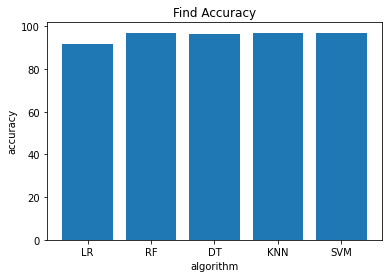

In [77]:
import matplotlib.pyplot as plt
x = ["LR", "RF", "DT", "KNN", "SVM"]
y = [log_reg,ran_for,dec_tre,k_neig,sup_vec]
plt.bar(x,y)
plt.xlabel("algorithm")
plt.ylabel("accuracy")
plt.title("Find Accuracy")
plt.show(x,y)

##7.Comparison of Models

In [72]:
result =pd.DataFrame({'ML Model':Model,'Test Accuracy':test})
result

,ML Model,Test Accuracy
0,LogisticRegression,91.678
1,Random Forest,96.970
2,Decision Tree,96.291
3,K-Nearest Neighbours,96.970
4,SVM,96.970


##8.Sorting 

In [74]:
result.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy
1,Random Forest,96.970
3,K-Nearest Neighbours,96.970
4,SVM,96.970
2,Decision Tree,96.291
0,LogisticRegression,91.678


##9.Saving the model

In [81]:
import pickle
pickle.dump(rf,open('Phishing_website.pkl','wb'))